### 18.2. Budowa sieci neuronowej

### Funkcje aktywacyjne

In [6]:
import tensorflow as tf

In [7]:
# # deklararujemy model
# model = Sequential([
#     Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
#     MaxPooling2D(),
#     Conv2D(32, 3, padding='same', activation='relu'),
#     MaxPooling2D(),
#     Conv2D(64, 3, padding='same', activation='relu'),
#     MaxPooling2D(),
#     Flatten(),
#     Dense(512, activation='relu'),
#     Dense(1)
# ])

# # kompilujemy model
# model.compile(
#     optimizer='adam',
#     loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
#     metrics=['accuracy']
# )

# # wypisujemy wartości warstw modelu
# model.summary()

# # trenujemy model
# history = model.fit_generator(
#     train_data_gen,
#     steps_per_epoch=total_train // batch_size,
#     epochs=epochs,
#     validation_data=val_data_gen,
#     validation_steps=total_val // batch_size
# )

### Optimizer

In [8]:
import tensorflow_addons as tfa

# from ranger import Ranger  # this is from ranger.py
# from ranger import RangerVA  # this is from ranger913A.py
# from ranger import RangerQH  # this is from rangerqh.py

Sposób 1. Każdy optimizer posiada swoją nazwę, która go w pełni identyfikuje. Aby go użyć z domyślnymi parametrami, wystarczy podczas kompilacji modelu jako optimizer wpisać tę nazwę.


In [9]:
# #przykładowy optimizer z tensorflow
# tf.keras.optimizers.Adam(
#     learning_rate=0.001,
#     beta_1=0.9,
#     beta_2=0.999,
#     epsilon=1e-07,
#     amsgrad=False,
#     name='Adam',
#     **kwargs
# )

# # przekazujemy nazwę, która identyfikuje nasz optimizer
# model.compile(optimizer='adam', ...)

Sposób 2. Jeżeli chcemy zmienić jakąkolwiek wartość (np. learning_rate), powinniśmy przekazać nowy obiekt optimizera do metody compile.

In [10]:
# # tworzymy obiekt typu Adam z naszym learning rate
# adam_optim = keras.optimizers.Adam(learning_rate=0.0001)

# # tworzymy model
# # ...

# # przekazujemy obiekt zamiast nazwy
# model.compile(optimizer=adam_optim, ...)

# # szkolimy model
# # ...

### Schedulers

In [11]:
# model.fit(
#     ...,
#     callbacks=[
#         tf.keras.callbacks.LearningRateScheduler(wlasna_funkcja)
#     ]
# )

In [12]:
# # Najprostszym sposobem, aby uzyskać zmianę learning_rate jest ustawienie parametru decay 
# # w optimizerach (jest to parametr klasy bazowej, więc trzeba go szukać tutaj).
# adam_opt = keras.optimizers.Adam(lr=0.01, decay=1e-5)

# # Exponential scheduling ze stałą wartością learning_rate – zmiana wartości learning_rate 
# # wykładniczo:
# def exponential_decay_fn(epoch):
# 	return 0.05 * 0.2**(epoch / 10)

# # Exponential scheduling z wartością zależną od aktualnego learning_rate:
# def exponential_decay_fn(epoch, current_lr):
#   return current_lr * 0.2**(epoch / 10)

# # Scheduler zależny od numeru epoki:
# # - dla pierwszych epok ustaw duża wartość
# # - dla epok do 20 ustaw mniejszą wartość
# # - dla pozostałych ustaw małą wartość
# def const_scheduler(epoch):
#     if epoch < 10:
#           return 0.05
#     elif epoch < 20:
#           return 0.005
#     else:
#           return 0.0005

### Loss Functions – funkcje błędu

Poniższy wzór jest pokazany tylko w celach informacyjnych (oraz dlatego, że na każdej rozmowie o pracę pada pytanie o to, jaki wzór ma ta funkcja :)).

### L = -y*log(p) - (1-y) * log(1-p)


L – Loss, wartość błędu

y – wartość prawdziwa (numer klasy)

p – prawdopodobieństwo wyznaczone przez model dla danej klasy

In [13]:
# print(labels)

# # [9 0 0 ... 3 0 5]

# print("spase: ", labels[0])
# one_hot_label = tf.keras.utils.to_categorical(labels[0])
# print("one hot encoded ", one_hot_label)

In [14]:
# tf.keras.losses.CategoricalCrossentropy(
#     from_logits=False,
#     label_smoothing=0,
#     reduction=losses_utils.ReductionV2.AUTO,
#     name='categorical_crossentropy'
# )

# #przekazujemy nazwę, która identyfikuje naszą funkcję
# model.compile(..., loss='categorical_crossentropy)

In [15]:
# # tworzymy obiekt CategoricalCrossEntropy
# loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

# # tworzymy model
# # ...

# # przekazujemy obiekt zamiast nazwy
# model.compile(..., loss=loss_fn)

# # szkolimy model
# #...

# Zadanie: model klasyfikacji
Stwórz model klasyfikacji, w oparciu o architekturę sieci neuronowych. Naucz model klasyfikować gatunki kwiatów, wykorzystując zbiór Iris. Pamiętaj, że jest to klasyfikacja wieloklasowa, w związku z tym w ostatniej warstwie sieci powinna być funkcja aktywacji Softmax.

Prześlij Mentorowi link do swojego Notatnika w Jupyterze.

In [50]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt


iris = load_iris()
# import seaborn as sns
# iris = sns.load_dataset('iris')
X, y, iris_classes = iris.data, iris.target, iris.target_names
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [61]:
iris.data.shape

(150, 4)

In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, 
                                    random_state=42, stratify=y)

In [118]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

In [32]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import BatchNormalization
from keras.layers import AveragePooling2D
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import Input
from keras.layers import concatenate

In [129]:
def const_scheduler(epoch):
    if epoch < 10:
          return 0.05
    elif epoch < 20:
          return 0.005
    else:
          return 0.0005
    
# deklararujemy model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=[4,1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu')),
model.add(Flatten()),
model.add(Dense(512, activation='softmax')),
model.add(Dense(1))

model.build((None, 4))

# kompilujemy model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# wypisujemy wartości warstw modelu
model.summary()

callback=[tf.keras.callbacks.LearningRateScheduler(const_scheduler)]

history = model.fit(X_train, y_train, batch_size=32, epochs=200, 
                    validation_data=(X_test, y_test), 
                    callbacks=[callback])

Model: "sequential_70"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_97 (Dense)            (None, 4, 16)             32        
                                                                 
 dense_98 (Dense)            (None, 4, 32)             544       
                                                                 
 dense_99 (Dense)            (None, 4, 64)             2112      
                                                                 
 flatten_44 (Flatten)        (None, 256)               0         
                                                                 
 dense_100 (Dense)           (None, 512)               131584    
                                                                 
 dense_101 (Dense)           (None, 1)                 513       
                                                                 
Total params: 134,785
Trainable params: 134,785
Non-t

# 18.3. Podstawowe warstwy sieci neuronowych

### Dense Layer

In [131]:
import tensorflow as tf

dense_layer = tf.keras.layers.Dense(32)

# albo bardziej dosłownie

dense_layer = tf.keras.layers.Dense(units=32)

### Flatten Layer

In [132]:
flatten = tf.keras.layers.Flatten()

### Tworzenie sieci neuronowej w TensorFlow

In [135]:
# output = nasz_model(dane_wejsciowe)

In [136]:
import tensorflow as tf
import keras.layers as layers

input_data = tf.ones((16, 3, 3))

#stworzenie modelu
seq_model = tf.keras.Sequential()

# sposób pierwszy

# input_shape jest niewymagane, lecz pozwala powiedzieć,
# "chcę mieć taki rozmiar danych wejściowych", co pozwala
# uniknąć głupich pomyłek w stylu: przekazujemy inny rozmiar,
# bo zapomnieliśmy np. zmniejszyć obrazów wejściowych
seq_model.add(tf.keras.layers.Flatten(input_shape=[3, 3]))
seq_model.add(tf.keras.layers.Dense(units=16, name='input_layer'))
seq_model.add(tf.keras.layers.Dense(units=32, name='hidden_layer'))
seq_model.add(tf.keras.layers.Dense(units=4, name='output_layer'))

# sposób drugi
seq_model_2 = tf.keras.Sequential([
    layers.Flatten(),
    layers.Dense(16, name="input_layer"),
    layers.Dense(32, name="hidden_layer"),
    layers.Dense(4, name="output_layer")
])

# uruchomienie naszego modelu z wygenerowanymi danymi
output = seq_model(input_data)
print(output)
output2 = seq_model_2(input_data)
print(output2)


tf.Tensor(
[[ 0.7388872  0.8521431 -1.3374448  1.0928134]
 [ 0.7388872  0.8521431 -1.3374448  1.0928134]
 [ 0.7388872  0.8521431 -1.3374448  1.0928134]
 [ 0.7388872  0.8521431 -1.3374448  1.0928134]
 [ 0.7388872  0.8521431 -1.3374448  1.0928134]
 [ 0.7388872  0.8521431 -1.3374448  1.0928134]
 [ 0.7388872  0.8521431 -1.3374448  1.0928134]
 [ 0.7388872  0.8521431 -1.3374448  1.0928134]
 [ 0.7388872  0.8521431 -1.3374448  1.0928134]
 [ 0.7388872  0.8521431 -1.3374448  1.0928134]
 [ 0.7388872  0.8521431 -1.3374448  1.0928134]
 [ 0.7388872  0.8521431 -1.3374448  1.0928134]
 [ 0.7388872  0.8521431 -1.3374448  1.0928134]
 [ 0.7388872  0.8521431 -1.3374448  1.0928134]
 [ 0.7388872  0.8521431 -1.3374448  1.0928134]
 [ 0.7388872  0.8521431 -1.3374448  1.0928134]], shape=(16, 4), dtype=float32)
tf.Tensor(
[[-0.16735505 -0.05366759 -0.8764189   0.738747  ]
 [-0.16735505 -0.05366759 -0.8764189   0.738747  ]
 [-0.16735505 -0.05366759 -0.8764189   0.738747  ]
 [-0.16735505 -0.05366759 -0.8764189   0.

In [139]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [138]:
tf.keras.datasets.fashion_mnist.load_data()
train, test = tf.keras.datasets.fashion_mnist.load_data()

# wydobycie obrazów oraz labelek
images, labels = train

# normalizacja wartości pikseli (maks. wartość wynosi 255.0, 
# czyli aby znormalizować nasze dane, musimy podzielić każdy piksel przez maks. wartość)
images = images/255.0

# zapisujemy dane jako int
labels = labels.astype(np.int32)

4422102/4422102 [==============================] - 4s 1us/step


In [140]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.1, random_state=10, stratify=labels)

In [144]:
# stworzenie zbioru typu Dataset z naszej listy
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# ustawienie batch_size na 32 oraz przetasowanie na bazie 1000 próbek
train_ds = train_ds.shuffle(1000).batch(32)

In [148]:
#stworzenie modelu
f_mnist_model = tf.keras.Sequential([
    # spłaszczanie obrazka do wektora jednowymiarowego
    layers.Flatten(input_shape=[28, 28]),

    layers.Dense(300, activation='relu'),
    layers.Dense(200, activation='relu'),
    layers.Dense(150, activation='relu'),
    layers.Dense(100, activation='relu'),
    
    # ostatnia warstwa posiada tyle neuronów ile mamy klas
    layers.Dense(10, activation='softmax')])

f_mnist_model.summary()

Model: "sequential_75"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_50 (Flatten)        (None, 784)               0         
                                                                 
 dense_114 (Dense)           (None, 300)               235500    
                                                                 
 dense_115 (Dense)           (None, 200)               60200     
                                                                 
 dense_116 (Dense)           (None, 150)               30150     
                                                                 
 dense_117 (Dense)           (None, 100)               15100     
                                                                 
 dense_118 (Dense)           (None, 10)                1010      
                                                                 
Total params: 341,960
Trainable params: 341,960
Non-t

### Kompilacja modelu

In [149]:
f_mnist_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

### Szkolenie modelu

In [150]:
train_stats = f_mnist_model.fit(train_ds, epochs=10, verbose=1)

Epoch 1/10
1688/1688 [==============================] - 9s 4ms/step - loss: 0.5005 - accuracy: 0.8175
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3757 - accuracy: 0.8613
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3398 - accuracy: 0.8758
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3134 - accuracy: 0.8821
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2947 - accuracy: 0.8904
Epoch 6/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2813 - accuracy: 0.8946
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2670 - accuracy: 0.8994
Epoch 8/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2563 - accuracy: 0.9042
Epoch 9/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2486 - accuracy: 0.9062
Epoch 10/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.236

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

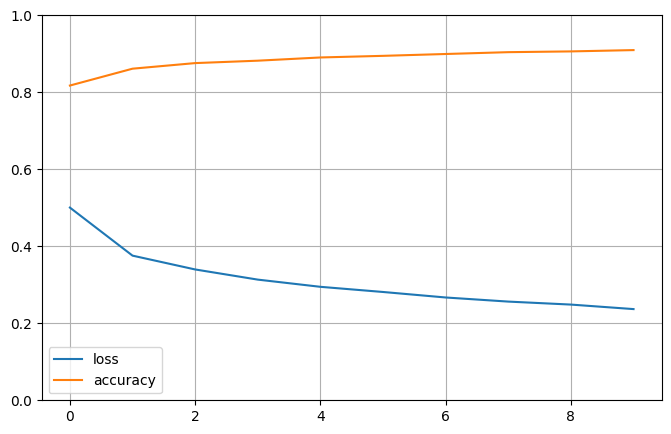

In [152]:
pd.DataFrame(train_stats.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [153]:
y_pred = f_mnist_model.predict(X_test)
print("probs : ", y_pred[2])
print("klasa :", np.argmax(y_pred[2]))
print("rzeczywista klasa: ", y_test[2])

"""
probs :  [4.0548810e-15 1.0000000e+00 9.3477974e-17 5.3090128e-13 7.5702587e-15
 5.9295928e-25 2.1536054e-11 3.4459677e-24 2.8725664e-16 2.4974258e-22]
klasa : 1
rzeczywista klasa:  1
"""

188/188 [==============================] - 1s 2ms/step
probs :  [5.1412330e-26 0.0000000e+00 9.2706207e-34 1.9538803e-33 1.2226658e-32
 1.0000000e+00 7.8216251e-30 2.2317687e-17 1.1589095e-31 9.2007881e-20]
klasa : 5
rzeczywista klasa:  5


'\nprobs :  [4.0548810e-15 1.0000000e+00 9.3477974e-17 5.3090128e-13 7.5702587e-15\n 5.9295928e-25 2.1536054e-11 3.4459677e-24 2.8725664e-16 2.4974258e-22]\nklasa : 1\nrzeczywista klasa:  1\n'

### Functional API do stworzenia modelu w TensorFlow

In [155]:
# model implementujący Residual Layer za pomocą Functional API:

In [156]:
# stworzenie wejścia

input = tf.keras.Input(shape=X_train.shape[1:])

# możemy wypisać, co ta warstwa przyjmuje - jest to rozmiar
# naszego obrazka bez batch_size (który ma wartość None)
print(input)

# spłaszczenie wejścia
input_flat = layers.Flatten(input_shape=[28,28])(input)

# nasza kolejna warstwa jest typu Dense, jak poprzednio, ale od razu
# i bezpośrednio przekazujemy jej wejście, tak jak funkcji w Pythonie:
hidden_1 =layers.Dense(320, activation='relu', name="hidden_1")(input_flat)
hidden_2 =layers.Dense(150, activation='relu', name="hidden_2")(hidden_1)

# złączamy wyniki z obu warstw za pomocą warstwy typu Concatenate
concat_layer = layers.Concatenate()([input_flat, hidden_2])
output = layers.Dense(10, activation='softmax')(concat_layer)

# tworzymy model, przekazując mu co ma być naszymi wyjściami, a co wejściami
model_res = tf.keras.Model(inputs=[input], outputs=[output])

# podsumowanie naszego modelu
model_res.summary()

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_51 (Flatten)           (None, 784)          0           ['input_1[0][0]']                
                                                                                                  
 hidden_1 (Dense)               (None, 320)          251200      ['flatten_51[0][0]']             
                                                                                                  
 hidden_2 (Dense)               (None, 150)  

In [160]:
# kompilacja
model_res.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

#szkolenie na takich samych danych jak poprzednio
train_stats = model_res.fit(train_ds, epochs=10, verbose=1)

Epoch 1/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.4858 - accuracy: 0.8250
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3636 - accuracy: 0.8660
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3292 - accuracy: 0.8781
Epoch 4/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.3027 - accuracy: 0.8871
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2841 - accuracy: 0.8934
Epoch 6/10
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2721 - accuracy: 0.8984
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2550 - accuracy: 0.9026
Epoch 8/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2460 - accuracy: 0.9066
Epoch 9/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2346 - accuracy: 0.9105
Epoch 10/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.22

In [157]:
# Stwórzmy teraz drugi model, z dwoma wyjściami dla tekstu:

In [158]:
# pamiętajmy, aby nie dodawać pierwszego wymiaru (batch_size)
text = np.array([["ala ma kota"]])

In [159]:
text = np.array([["ala ma kota"]])

input_1 = tf.keras.Input(shape=text.shape[1:])
input_2 = tf.keras.Input(shape=X_train.shape[1:])

# nasza kolejna warstwa jest typu Dense, jak poprzednio,
# ale od razu przekazujemy jej wejście, tak jak funkcji w Pythonie
hidden_1 =layers.Dense(320, activation='relu')(input_1)
hidden_2 =layers.Dense(150, activation='relu')(hidden_1)

# złączamy wyniki naszych warstw za pomocą warstwy
# typu Concatenate podając jako argumenty input_1 oraz hidden_2
concat_layer = layers.Concatenate()([input_1, hidden_2])
output = layers.Dense(10, activation='softmax')(concat_layer)

# tworzymy model, przekazując mu co ma być naszymi wyjściami, a co wejściami
model = tf.keras.Model(inputs=[input_1, input_2], outputs=[output])

# podsumowanie naszego modelu
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense_120 (Dense)              (None, 320)          640         ['input_2[0][0]']                
                                                                                                  
 dense_121 (Dense)              (None, 150)          48150       ['dense_120[0][0]']              
                                                                                                  
 concatenate_1 (Concatenate)    (None, 151)          0           ['input_2[0][0]',                
                                                                  'dense_121[0][0]']        